In [1]:
import os
path = os.getcwd()
print(path)
os.chdir('/home/jupyter/project-1')
path = os.getcwd()
print(path)

import io
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path
import pandas as pd
import pickle
import PIL
import torch
import torchvision
import urllib
import warnings
import sys

sys.path.append(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..'))
from attacks import eot_attack_evaluator
from attacks import eot_attacks
from attacks import utils
from utils import labels_util

# Disable annoying UserWarning caused by using nn.Upsample
# in the relighting model.
warnings.filterwarnings("ignore", category=UserWarning) 

%load_ext autoreload
%autoreload 2

/home/jupyter/project-1/experiments
/home/jupyter/project-1


# I. PubFig10 + FaceNet + [multiilum | DPR] evaluation

## I.a. Pretrained classifier

In [2]:
pubfig_configs = [
{
    'dataset': 'pubfig83',
    'dataset_mode': 'test',
    'classif_model_name': 'pubfig83_facenet',
    'classif_mode': 'normal_pretrained',
    'relight_model_name': 'dpr',
    
    'relight_checkpoint_path': 'relighters/DPR/trained_model/trained_model_03.t7',
    'relighter_eps': 1e-4,
    'learning_rate': 0.02, 
    'num_iterations': 5, 
    'gamma': 1.4, 
    'epses': [0.1],
    'attack_type': 'class_constrained_eot',
    'targets': [1, 3],     # eg: [0, 8] Target: 'Aaron Eeckhart' for everyone besides himself, otherwise 'Quincy Jones'
    'debugging': False,
}]

Loading pretrained model!
Training FaceNet on PubFig10
Loaded pretrained classifier: pubfig83_facenet.
Loaded the relighter: dpr.
--------------------------------------------------------------------
eps:  0.1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


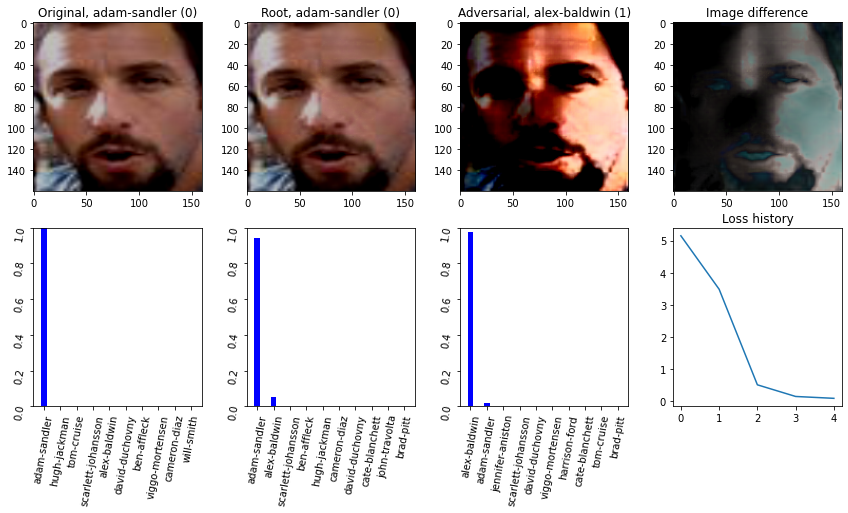

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


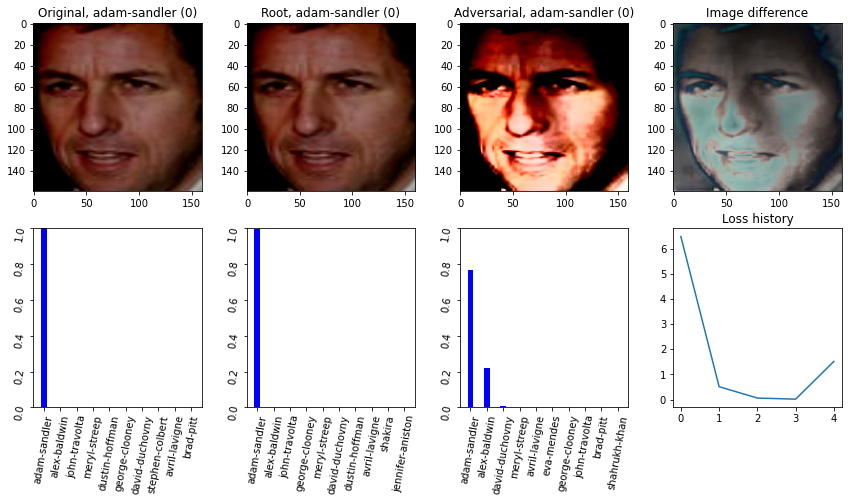

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


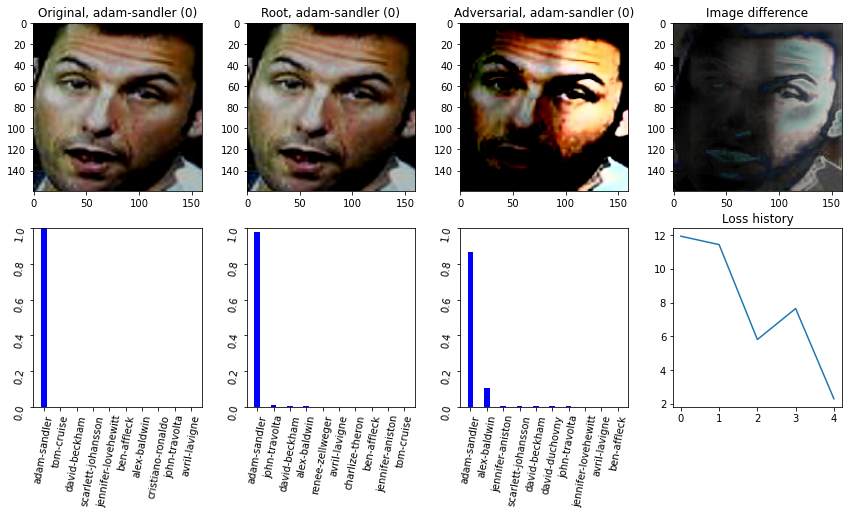

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7f8fd982c560>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/matplotlib/transforms.py", line 177, in <lambda>
    ref = weakref.ref(self, lambda ref, sid=id(self),
KeyboardInterrupt
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


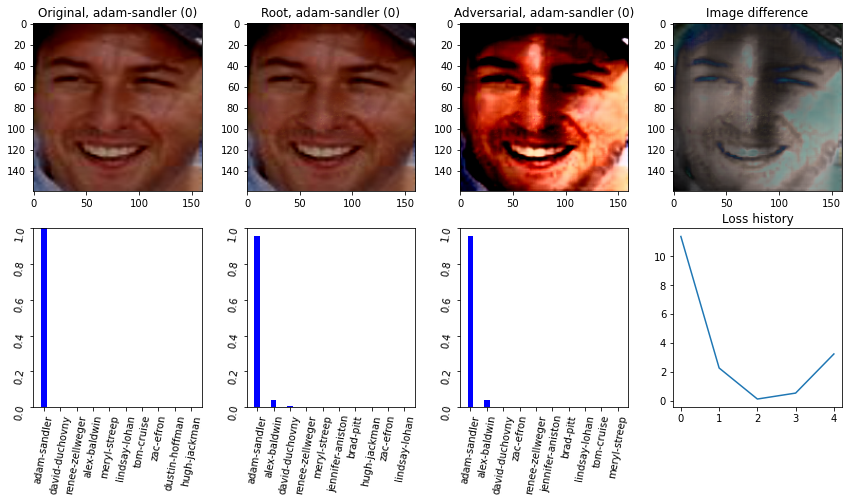

KeyboardInterrupt: 

In [3]:
for config in pubfig_configs:
    ev = eot_attack_evaluator.AttackEvaluator(config, '_results_last.csv')
    ev.evaluate()

## I. b. Adversarially trained classifier

In [ ]:
adv_pubfig_config = {
    'dataset': 'pubfig10',
    'dataset_mode': 'test',
    'classif_model_name': 'pubfig_facenet',
    
    # Difference! This time we evaluate a classifier that is adversarially trained on the spot.
    'classif_mode': 'adversarial_train',     
    'relight_model_name': 'dpr',
    
    'relight_checkpoint_path': '../relighters/DPR/trained_model/trained_model_03.t7',
    'learning_rate': 0.02, 
    'num_iterations': 5, 
    'epses': [0.1],
    'attack_type': 'class_constrained_eot',
    'targets': [1, 3],
    'debugging': False,

}

ev = eot_attack_evaluator.AttackEvaluator(adv_pubfig_config, '_results_adv.csv')
ev.evaluate()

# II. ResNet + Indoor Scenes + multiilum (TBD)

In [ ]:
indoor_configs = [
{
    'dataset': 'indoor_scenes',
    'dataset_mode': 'test',
    'classif_model_name': 'resnet_indoor',
    'classif_mode': 'normal_pretrained',
    'relight_model_name': 'multi_illumination_murmann',
    
    
    'relight_checkpoint_path': '../relighters/multi_illumination/'\
                               'checkpoints/relight/epoch_13.pth',
    
    # Relighter-specific constant.
    'relighter_eps': 1e-4,
    
    # Learning rate for attack gradient descent.
    'learning_rate': 0.05, 
    
    # Number of gradient descent iterations in the attack.
    'num_iterations': 5, 
    
    # Gamma correction constant for the multi_illumination relighter.
    'gamma': 1.3,
    
    # Radius of ball of inf-norm of allowed perturbations.
    'epses': [0.001, 0.005, 0.01],
    
    # Constrain the perturbed image to be in the same class as
    # the original image.
    'attack_type': 'class_constrained_eot',
    
    # Target label is 9 (warehouse) for all non-warehouse images, otherwise 0 (airport)
    'targets': [9, 0],
    
    'debugging': False,
},
]